#### COMPANION WORKBOOK

# Regression Algorithms

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. The "Final Boss" of Machine Learning

In [31]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [32]:
x = np.linspace(0, 2*np.pi, 100)
# this creates a sin wave that goes between zero and 2pi
# what does the 100 mean here? idk 

np.random.seed(321)
noise = np.random.normal(0, .5, 100)
# this makes 100 dots of noise at .5

y = np.sin(x) + noise
# this creates a function based on the 'x' and 'noise' we defined above

In [33]:
df = pd.DataFrame({'x' : x, 'y': y})
df.head()
# explain how to express x and y

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


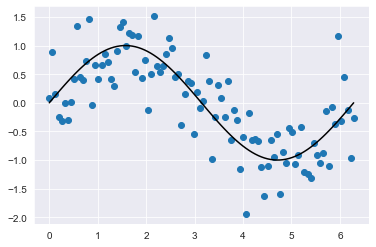

In [34]:
plt.scatter(df.x, df.y)
# this creates a scatter plot of the simulated data

plt.plot(df.x, np.sin(df.x), color='k')
#this plots the line on top of the function

plt.show()
# this hides some processing code text that displays

## II. Flaws of Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

X = df.drop('y', axis=1)
y = df.y

lm.fit(X, y)

LinearRegression()

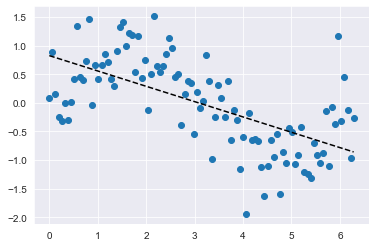

In [37]:
plt.scatter(df.x, df.y)
plt.plot(df.x, lm.predict(X), 'k--')
plt.show()

#yea I don't really know what's happening with these x's and y's it does not makes sense to me :))

In [38]:
df_garbage = df.copy()
np.random.seed(555)
# so here, we make a copy of the data frame and then set a random seed

for n in range(1, 100):
    df_garbage['g{}'.format(n)] = np.random.uniform(0, 2*np.pi, 100)
    
# then here we create 99 "garbage features"

In [39]:
df_garbage.head()

,x,y,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,...,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99
0,0.000000,0.086260,4.510285,4.243360,5.077364,5.775407,0.870371,1.042189,3.288845,1.005865,1.052502,3.175580,5.895522,5.870488,3.903133,2.668519,3.282817,4.094173,0.880424,2.996213,3.118989,1.147824,2.837148,2.839650,0.409650,3.642829,1.642933,1.301822,3.908672,1.028190,6.184563,0.906429,3.453761,5.314957,5.858500,5.133156,4.603108,3.380052,1.475456,3.803071,1.342119,3.534845,5.418094,5.925285,2.783191,2.837559,3.204982,4.144391,5.980749,6.227680,...,5.363106,4.839501,0.960421,0.408669,6.235134,2.954037,2.163008,3.038309,5.987287,5.411146,5.856653,4.570137,4.736102,6.229399,6.073511,0.893500,1.589484,5.690909,5.878595,0.365318,5.848337,3.098962,3.421179,3.973730,3.326170,3.087506,1.867172,4.839791,1.999900,3.886663,2.556170,5.712216,4.048645,5.348714,3.372741,4.380841,1.461631,1.911605,5.457319,3.004112,1.739148,0.401207,2.986740,3.419816,2.210869,4.116052,5.651802,2.931066,1.542499,2.299154
1,0.063467,0.881165,0.300683,2.204225,0.492213,5.097731,0.541594,0.343164,4.840217,4.343630,3.149967,2.076274,1.759298,5.444094,2.938032,4.200197,1.199190,3.979148,1.598494,1.758741,4.024471,3.951020,5.422190,4.514172,4.459619,3.159930,2.901864,0.695287,3.383681,2.629020,2.315087,0.769659,5.558526,2.897195,4.162310,2.788518,1.778288,4.323651,0.896190,3.713252,2.051931,4.212852,2.696321,0.429951,4.825293,0.743045,1.208494,0.011320,1.930851,2.532398,...,3.947482,5.851334,0.134162,3.437023,3.893171,1.756536,1.058794,2.976196,1.201085,5.513009,5.889551,6.090618,0.864594,3.960307,0.682757,4.816860,0.939704,6.267313,6.160211,4.368340,0.290720,5.458159,5.001682,2.887322,6.169497,4.332155,3.736490,2.409075,6.151429,6.208335,3.504041,4.846901,1.929619,2.411624,2.592169,1.236924,1.991130,2.231070,5.871841,1.519105,0.372066,2.432486,1.130922,0.067541,2.857747,5.934834,5.213061,5.579050,4.092146,4.464422
2,0.126933,0.145261,5.934292,4.499745,5.629712,0.721088,4.499597,1.054771,3.207139,2.356321,2.537807,1.889433,4.656596,4.494877,1.194202,4.760009,1.207124,3.588651,4.299645,2.416517,5.071783,1.871949,5.002775,3.996491,2.397042,2.290254,5.528217,1.017353,1.718960,5.290628,5.531407,0.835479,1.563958,4.339918,2.985258,1.966871,3.504641,5.421886,1.755435,5.266469,1.076330,2.430177,3.066581,6.143974,2.935596,5.280540,3.903075,4.433316,2.250051,4.321500,...,4.673700,4.370303,4.670778,4.273211,0.132446,3.980181,3.759853,5.298938,0.398279,1.049623,1.362105,0.049970,6.213079,5.819508,6.259281,3.599359,4.525876,0.989356,2.649699,0.107822,2.293262,2.864385,4.091935,6.132996,5.655899,3.972261,4.055669,4.399490,1.990648,0.988087,2.996496,6.040177,2.232170,2.774042,6.055675,2.695219,1.535565,0.155993,2.990297,1.929394,0.254268,3.335856,5.061090,0.854903,1.861820,0.216191,4.707951,1.171044,3.402163,5.652485
3,0.190400,-0.252824,4.312653,1.798761,6.126937,0.804294,4.019667,5.314475,3.989411,2.739722,3.497290,1.722815,6.185798,4.289519,2.196523,4.345576,1.969896,2.191259,0.942655,3.874540,1.176396,5.422721,1.962456,6.161889,2.249732,4.839469,1.383888,4.113686,4.296099,4.355895,1.858601,4.973328,3.050362,0.032895,5.773996,2.074032,1.523783,2.329209,0.970743,5.725764,3.163545,1.827271,5.849702,1.636496,2.248112,1.238136,0.406243,3.651160,3.227052,1.671514,...,2.496149,5.247725,4.076593,0.113816,2.536973,0.913940,4.666268,5.025258,1.228076,3.532962,3.878686,5.955161,4.445355,5.922151,1.837340,2.228289,0.254234,5.875696,3.738087,0.538353,3.082641,4.559514,0.776358,4.498631,2.356502,2.334325,1.920327,3.121354,3.930723,5.660037,0.922580,0.415104,5.080458,4.569396,6.111622,5.518925,0.470294,1.277002,1.263333,1.807333,0.749275,0.430104,3.887071,0.294676,0.168721,4.298122,5.752676,5.008056,3

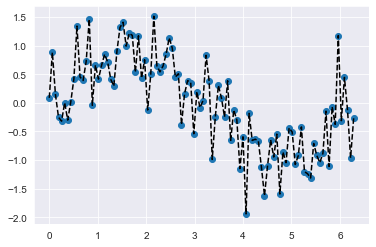

In [40]:
X_garbage = df_garbage.drop('y', axis=1)
# I don't really understand why we're dropping y but we are

lm_garbage = LinearRegression()
lm_garbage.fit(X_garbage, y)
# this fits "the model" onto garbage features

plt.scatter(df.x, df.y)
plt.plot(df.x, lm_garbage.predict(X_garbage), 'k--')
plt.show()

## III. Regularized Regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
from sklearn.linear_model import Ridge

In [43]:
from sklearn.linear_model import ElasticNet

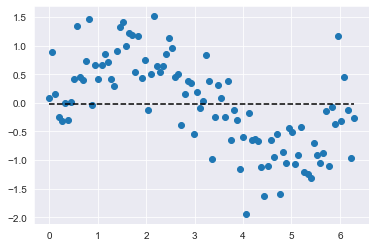

In [44]:
lasso = Lasso(random_state=1234)
lasso.fit(X_garbage, y)

plt.scatter(df.x, df.y)
plt.plot(df.x, lasso.predict(X_garbage), 'k--')
plt.show()

In [45]:
lasso.coef_

#default lasso value is alpha = 1

array([-0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
        0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,
        0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.])

In [46]:
lasso2 = Lasso(alpha=0.1, random_state=1234)
lasso2.fit(X_garbage, y)

#this reduced the penalty and made it more accurate to fit the model

Lasso(alpha=0.1, random_state=1234)

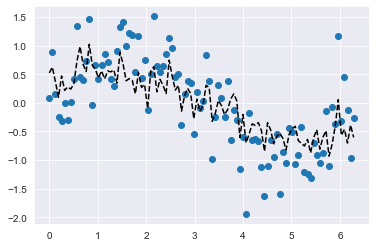

In [47]:
plt.scatter(df.x, df.y)
plt.plot(df.x, lasso2.predict(X_garbage), 'k--')
plt.show()

In [48]:
lasso2.coef_

array([-0.22232828,  0.        , -0.        , -0.00759667,  0.        ,
        0.        , -0.        , -0.03601924, -0.        ,  0.00433404,
        0.        , -0.02505424, -0.01967545,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.026227  ,
       -0.        ,  0.00728013,  0.        ,  0.0148694 , -0.        ,
       -0.        , -0.        , -0.02186635, -0.        , -0.        ,
       -0.01356253,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.00090083, -0.        ,
        0.00258886,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00085948,  0.        ,  0.        , -0.0046698 , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.01597034,
       -0.01172187,  0.        , -0.        , -0.01543636, -0.        ,
        0.        , -0.01006564, -0.00366761,  0.        ,  0.02

## IV. Ensemble Methods

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 4.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, check that you've re-generated the simulated noisy sine dataset. Plot the scatterplot.

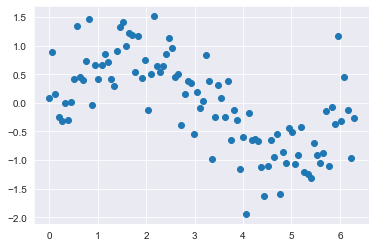

In [51]:
plt.scatter(df.x, df.y)
plt.show()

#this creates our scatter plot and hides the code that shows

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="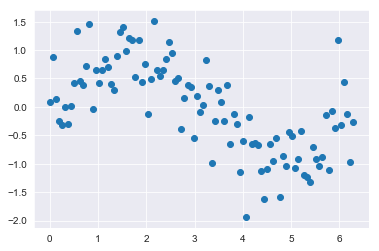&#10;">

#### B.) Next, check that you've successfully created the "garbage" dataset with 99 useless input features.  Display the first 5 observations from  <code>df_garbage</code>.

In [52]:
df_garbage.head()

,x,y,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,...,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99
0,0.000000,0.086260,4.510285,4.243360,5.077364,5.775407,0.870371,1.042189,3.288845,1.005865,1.052502,3.175580,5.895522,5.870488,3.903133,2.668519,3.282817,4.094173,0.880424,2.996213,3.118989,1.147824,2.837148,2.839650,0.409650,3.642829,1.642933,1.301822,3.908672,1.028190,6.184563,0.906429,3.453761,5.314957,5.858500,5.133156,4.603108,3.380052,1.475456,3.803071,1.342119,3.534845,5.418094,5.925285,2.783191,2.837559,3.204982,4.144391,5.980749,6.227680,...,5.363106,4.839501,0.960421,0.408669,6.235134,2.954037,2.163008,3.038309,5.987287,5.411146,5.856653,4.570137,4.736102,6.229399,6.073511,0.893500,1.589484,5.690909,5.878595,0.365318,5.848337,3.098962,3.421179,3.973730,3.326170,3.087506,1.867172,4.839791,1.999900,3.886663,2.556170,5.712216,4.048645,5.348714,3.372741,4.380841,1.461631,1.911605,5.457319,3.004112,1.739148,0.401207,2.986740,3.419816,2.210869,4.116052,5.651802,2.931066,1.542499,2.299154
1,0.063467,0.881165,0.300683,2.204225,0.492213,5.097731,0.541594,0.343164,4.840217,4.343630,3.149967,2.076274,1.759298,5.444094,2.938032,4.200197,1.199190,3.979148,1.598494,1.758741,4.024471,3.951020,5.422190,4.514172,4.459619,3.159930,2.901864,0.695287,3.383681,2.629020,2.315087,0.769659,5.558526,2.897195,4.162310,2.788518,1.778288,4.323651,0.896190,3.713252,2.051931,4.212852,2.696321,0.429951,4.825293,0.743045,1.208494,0.011320,1.930851,2.532398,...,3.947482,5.851334,0.134162,3.437023,3.893171,1.756536,1.058794,2.976196,1.201085,5.513009,5.889551,6.090618,0.864594,3.960307,0.682757,4.816860,0.939704,6.267313,6.160211,4.368340,0.290720,5.458159,5.001682,2.887322,6.169497,4.332155,3.736490,2.409075,6.151429,6.208335,3.504041,4.846901,1.929619,2.411624,2.592169,1.236924,1.991130,2.231070,5.871841,1.519105,0.372066,2.432486,1.130922,0.067541,2.857747,5.934834,5.213061,5.579050,4.092146,4.464422
2,0.126933,0.145261,5.934292,4.499745,5.629712,0.721088,4.499597,1.054771,3.207139,2.356321,2.537807,1.889433,4.656596,4.494877,1.194202,4.760009,1.207124,3.588651,4.299645,2.416517,5.071783,1.871949,5.002775,3.996491,2.397042,2.290254,5.528217,1.017353,1.718960,5.290628,5.531407,0.835479,1.563958,4.339918,2.985258,1.966871,3.504641,5.421886,1.755435,5.266469,1.076330,2.430177,3.066581,6.143974,2.935596,5.280540,3.903075,4.433316,2.250051,4.321500,...,4.673700,4.370303,4.670778,4.273211,0.132446,3.980181,3.759853,5.298938,0.398279,1.049623,1.362105,0.049970,6.213079,5.819508,6.259281,3.599359,4.525876,0.989356,2.649699,0.107822,2.293262,2.864385,4.091935,6.132996,5.655899,3.972261,4.055669,4.399490,1.990648,0.988087,2.996496,6.040177,2.232170,2.774042,6.055675,2.695219,1.535565,0.155993,2.990297,1.929394,0.254268,3.335856,5.061090,0.854903,1.861820,0.216191,4.707951,1.171044,3.402163,5.652485
3,0.190400,-0.252824,4.312653,1.798761,6.126937,0.804294,4.019667,5.314475,3.989411,2.739722,3.497290,1.722815,6.185798,4.289519,2.196523,4.345576,1.969896,2.191259,0.942655,3.874540,1.176396,5.422721,1.962456,6.161889,2.249732,4.839469,1.383888,4.113686,4.296099,4.355895,1.858601,4.973328,3.050362,0.032895,5.773996,2.074032,1.523783,2.329209,0.970743,5.725764,3.163545,1.827271,5.849702,1.636496,2.248112,1.238136,0.406243,3.651160,3.227052,1.671514,...,2.496149,5.247725,4.076593,0.113816,2.536973,0.913940,4.666268,5.025258,1.228076,3.532962,3.878686,5.955161,4.445355,5.922151,1.837340,2.228289,0.254234,5.875696,3.738087,0.538353,3.082641,4.559514,0.776358,4.498631,2.356502,2.334325,1.920327,3.121354,3.930723,5.660037,0.922580,0.415104,5.080458,4.569396,6.111622,5.518925,0.470294,1.277002,1.263333,1.807333,0.749275,0.430104,3.887071,0.294676,0.168721,4.298122,5.752676,5.008056,3

<strong style="color:RoyalBlue">Expected output:</strong>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
      <th>g1</th>
      <th>g2</th>
      <th>g3</th>
      <th>g4</th>
      <th>g5</th>
      <th>g6</th>
      <th>g7</th>
      <th>g8</th>
      <th>g9</th>
      <th>g10</th>
      <th>g11</th>
      <th>g12</th>
      <th>g13</th>
      <th>g14</th>
      <th>g15</th>
      <th>g16</th>
      <th>g17</th>
      <th>g18</th>
      <th>g19</th>
      <th>g20</th>
      <th>g21</th>
      <th>g22</th>
      <th>g23</th>
      <th>g24</th>
      <th>g25</th>
      <th>g26</th>
      <th>g27</th>
      <th>g28</th>
      <th>g29</th>
      <th>g30</th>
      <th>g31</th>
      <th>g32</th>
      <th>g33</th>
      <th>g34</th>
      <th>g35</th>
      <th>g36</th>
      <th>g37</th>
      <th>g38</th>
      <th>g39</th>
      <th>g40</th>
      <th>g41</th>
      <th>g42</th>
      <th>g43</th>
      <th>g44</th>
      <th>g45</th>
      <th>g46</th>
      <th>g47</th>
      <th>g48</th>
      <th>...</th>
      <th>g50</th>
      <th>g51</th>
      <th>g52</th>
      <th>g53</th>
      <th>g54</th>
      <th>g55</th>
      <th>g56</th>
      <th>g57</th>
      <th>g58</th>
      <th>g59</th>
      <th>g60</th>
      <th>g61</th>
      <th>g62</th>
      <th>g63</th>
      <th>g64</th>
      <th>g65</th>
      <th>g66</th>
      <th>g67</th>
      <th>g68</th>
      <th>g69</th>
      <th>g70</th>
      <th>g71</th>
      <th>g72</th>
      <th>g73</th>
      <th>g74</th>
      <th>g75</th>
      <th>g76</th>
      <th>g77</th>
      <th>g78</th>
      <th>g79</th>
      <th>g80</th>
      <th>g81</th>
      <th>g82</th>
      <th>g83</th>
      <th>g84</th>
      <th>g85</th>
      <th>g86</th>
      <th>g87</th>
      <th>g88</th>
      <th>g89</th>
      <th>g90</th>
      <th>g91</th>
      <th>g92</th>
      <th>g93</th>
      <th>g94</th>
      <th>g95</th>
      <th>g96</th>
      <th>g97</th>
      <th>g98</th>
      <th>g99</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
      <td>4.510285</td>
      <td>4.243360</td>
      <td>5.077364</td>
      <td>5.775407</td>
      <td>0.870371</td>
      <td>1.042189</td>
      <td>3.288845</td>
      <td>1.005865</td>
      <td>1.052502</td>
      <td>3.175580</td>
      <td>5.895522</td>
      <td>5.870488</td>
      <td>3.903133</td>
      <td>2.668519</td>
      <td>3.282817</td>
      <td>4.094173</td>
      <td>0.880424</td>
      <td>2.996213</td>
      <td>3.118989</td>
      <td>1.147824</td>
      <td>2.837148</td>
      <td>2.839650</td>
      <td>0.409650</td>
      <td>3.642829</td>
      <td>1.642933</td>
      <td>1.301822</td>
      <td>3.908672</td>
      <td>1.028190</td>
      <td>6.184563</td>
      <td>0.906429</td>
      <td>3.453761</td>
      <td>5.314957</td>
      <td>5.858500</td>
      <td>5.133156</td>
      <td>4.603108</td>
      <td>3.380052</td>
      <td>1.475456</td>
      <td>3.803071</td>
      <td>1.342119</td>
      <td>3.534845</td>
      <td>5.418094</td>
      <td>5.925285</td>
      <td>2.783191</td>
      <td>2.837559</td>
      <td>3.204982</td>
      <td>4.144391</td>
      <td>5.980749</td>
      <td>6.227680</td>
      <td>...</td>
      <td>5.363106</td>
      <td>4.839501</td>
      <td>0.960421</td>
      <td>0.408669</td>
      <td>6.235134</td>
      <td>2.954037</td>
      <td>2.163008</td>
      <td>3.038309</td>
      <td>5.987287</td>
      <td>5.411146</td>
      <td>5.856653</td>
      <td>4.570137</td>
      <td>4.736102</td>
      <td>6.229399</td>
      <td>6.073511</td>
      <td>0.893500</td>
      <td>1.589484</td>
      <td>5.690909</td>
      <td>5.878595</td>
      <td>0.365318</td>
      <td>5.848337</td>
      <td>3.098962</td>
      <td>3.421179</td>
      <td>3.973730</td>
      <td>3.326170</td>
      <td>3.087506</td>
      <td>1.867172</td>
      <td>4.839791</td>
      <td>1.999900</td>
      <td>3.886663</td>
      <td>2.556170</td>
      <td>5.712216</td>
      <td>4.048645</td>
      <td>5.348714</td>
      <td>3.372741</td>
      <td>4.380841</td>
      <td>1.461631</td>
      <td>1.911605</td>
      <td>5.457319</td>
      <td>3.004112</td>
      <td>1.739148</td>
      <td>0.401207</td>
      <td>2.986740</td>
      <td>3.419816</td>
      <td>2.210869</td>
      <td>4.116052</td>
      <td>5.651802</td>
      <td>2.931066</td>
      <td>1.542499</td>
      <td>2.299154</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881165</td>
      <td>0.300683</td>
      <td>2.204225</td>
      <td>0.492213</td>
      <td>5.097731</td>
      <td>0.541594</td>
      <td>0.343164</td>
      <td>4.840217</td>
      <td>4.343630</td>
      <td>3.149967</td>
      <td>2.076274</td>
      <td>1.759298</td>
      <td>5.444094</td>
      <td>2.938032</td>
      <td>4.200197</td>
      <td>1.199190</td>
      <td>3.979148</td>
      <td>1.598494</td>
      <td>1.758741</td>
      <td>4.024471</td>
      <td>3.951020</td>
      <td>5.422190</td>
      <td>4.514172</td>
      <td>4.459619</td>
      <td>3.159930</td>
      <td>2.901864</td>
      <td>0.695287</td>
      <td>3.383681</td>
      <td>2.629020</td>
      <td>2.315087</td>
      <td>0.769659</td>
      <td>5.558526</td>
      <td>2.897195</td>
      <td>4.162310</td>
      <td>2.788518</td>
      <td>1.778288</td>
      <td>4.323651</td>
      <td>0.896190</td>
      <td>3.713252</td>
      <td>2.051931</td>
      <td>4.212852</td>
      <td>2.696321</td>
      <td>0.429951</td>
      <td>4.825293</td>
      <td>0.743045</td>
      <td>1.208494</td>
      <td>0.011320</td>
      <td>1.930851</td>
      <td>2.532398</td>
      <td>...</td>
      <td>3.947482</td>
      <td>5.851334</td>
      <td>0.134162</td>
      <td>3.437023</td>
      <td>3.893171</td>
      <td>1.756536</td>
      <td>1.058794</td>
      <td>2.976196</td>
      <td>1.201085</td>
      <td>5.513009</td>
      <td>5.889551</td>
      <td>6.090618</td>
      <td>0.864594</td>
      <td>3.960307</td>
      <td>0.682757</td>
      <td>4.816860</td>
      <td>0.939704</td>
      <td>6.267313</td>
      <td>6.160211</td>
      <td>4.368340</td>
      <td>0.290720</td>
      <td>5.458159</td>
      <td>5.001682</td>
      <td>2.887322</td>
      <td>6.169497</td>
      <td>4.332155</td>
      <td>3.736490</td>
      <td>2.409075</td>
      <td>6.151429</td>
      <td>6.208335</td>
      <td>3.504041</td>
      <td>4.846901</td>
      <td>1.929619</td>
      <td>2.411624</td>
      <td>2.592169</td>
      <td>1.236924</td>
      <td>1.991130</td>
      <td>2.231070</td>
      <td>5.871841</td>
      <td>1.519105</td>
      <td>0.372066</td>
      <td>2.432486</td>
      <td>1.130922</td>
      <td>0.067541</td>
      <td>2.857747</td>
      <td>5.934834</td>
      <td>5.213061</td>
      <td>5.579050</td>
      <td>4.092146</td>
      <td>4.464422</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.145261</td>
      <td>5.934292</td>
      <td>4.499745</td>
      <td>5.629712</td>
      <td>0.721088</td>
      <td>4.499597</td>
      <td>1.054771</td>
      <td>3.207139</td>
      <td>2.356321</td>
      <td>2.537807</td>
      <td>1.889433</td>
      <td>4.656596</td>
      <td>4.494877</td>
      <td>1.194202</td>
      <td>4.760009</td>
      <td>1.207124</td>
      <td>3.588651</td>
      <td>4.299645</td>
      <td>2.416517</td>
      <td>5.071783</td>
      <td>1.871949</td>
      <td>5.002775</td>
      <td>3.996491</td>
      <td>2.397042</td>
      <td>2.290254</td>
      <td>5.528217</td>
      <td>1.017353</td>
      <td>1.718960</td>
      <td>5.290628</td>
      <td>5.531407</td>
      <td>0.835479</td>
      <td>1.563958</td>
      <td>4.339918</td>
      <td>2.985258</td>
      <td>1.966871</td>
      <td>3.504641</td>
      <td>5.421886</td>
      <td>1.755435</td>
      <td>5.266469</td>
      <td>1.076330</td>
      <td>2.430177</td>
      <td>3.066581</td>
      <td>6.143974</td>
      <td>2.935596</td>
      <td>5.280540</td>
      <td>3.903075</td>
      <td>4.433316</td>
      <td>2.250051</td>
      <td>4.321500</td>
      <td>...</td>
      <td>4.673700</td>
      <td>4.370303</td>
      <td>4.670778</td>
      <td>4.273211</td>
      <td>0.132446</td>
      <td>3.980181</td>
      <td>3.759853</td>
      <td>5.298938</td>
      <td>0.398279</td>
      <td>1.049623</td>
      <td>1.362105</td>
      <td>0.049970</td>
      <td>6.213079</td>
      <td>5.819508</td>
      <td>6.259281</td>
      <td>3.599359</td>
      <td>4.525876</td>
      <td>0.989356</td>
      <td>2.649699</td>
      <td>0.107822</td>
      <td>2.293262</td>
      <td>2.864385</td>
      <td>4.091935</td>
      <td>6.132996</td>
      <td>5.655899</td>
      <td>3.972261</td>
      <td>4.055669</td>
      <td>4.399490</td>
      <td>1.990648</td>
      <td>0.988087</td>
      <td>2.996496</td>
      <td>6.040177</td>
      <td>2.232170</td>
      <td>2.774042</td>
      <td>6.055675</td>
      <td>2.695219</td>
      <td>1.535565</td>
      <td>0.155993</td>
      <td>2.990297</td>
      <td>1.929394</td>
      <td>0.254268</td>
      <td>3.335856</td>
      <td>5.061090</td>
      <td>0.854903</td>
      <td>1.861820</td>
      <td>0.216191</td>
      <td>4.707951</td>
      <td>1.171044</td>
      <td>3.402163</td>
      <td>5.652485</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.252824</td>
      <td>4.312653</td>
      <td>1.798761</td>
      <td>6.126937</td>
      <td>0.804294</td>
      <td>4.019667</td>
      <td>5.314475</td>
      <td>3.989411</td>
      <td>2.739722</td>
      <td>3.497290</td>
      <td>1.722815</td>
      <td>6.185798</td>
      <td>4.289519</td>
      <td>2.196523</td>
      <td>4.345576</td>
      <td>1.969896</td>
      <td>2.191259</td>
      <td>0.942655</td>
      <td>3.874540</td>
      <td>1.176396</td>
      <td>5.422721</td>
      <td>1.962456</td>
      <td>6.161889</td>
      <td>2.249732</td>
      <td>4.839469</td>
      <td>1.383888</td>
      <td>4.113686</td>
      <td>4.296099</td>
      <td>4.355895</td>
      <td>1.858601</td>
      <td>4.973328</td>
      <td>3.050362</td>
      <td>0.032895</td>
      <td>5.773996</td>
      <td>2.074032</td>
      <td>1.523783</td>
      <td>2.329209</td>
      <td>0.970743</td>
      <td>5.725764</td>
      <td>3.163545</td>
      <td>1.827271</td>
      <td>5.849702</td>
      <td>1.636496</td>
      <td>2.248112</td>
      <td>1.238136</td>
      <td>0.406243</td>
      <td>3.651160</td>
      <td>3.227052</td>
      <td>1.671514</td>
      <td>...</td>
      <td>2.496149</td>
      <td>5.247725</td>
      <td>4.076593</td>
      <td>0.113816</td>
      <td>2.536973</td>
      <td>0.913940</td>
      <td>4.666268</td>
      <td>5.025258</td>
      <td>1.228076</td>
      <td>3.532962</td>
      <td>3.878686</td>
      <td>5.955161</td>
      <td>4.445355</td>
      <td>5.922151</td>
      <td>1.837340</td>
      <td>2.228289</td>
      <td>0.254234</td>
      <td>5.875696</td>
      <td>3.738087</td>
      <td>0.538353</td>
      <td>3.082641</td>
      <td>4.559514</td>
      <td>0.776358</td>
      <td>4.498631</td>
      <td>2.356502</td>
      <td>2.334325</td>
      <td>1.920327</td>
      <td>3.121354</td>
      <td>3.930723</td>
      <td>5.660037</td>
      <td>0.922580</td>
      <td>0.415104</td>
      <td>5.080458</td>
      <td>4.569396</td>
      <td>6.111622</td>
      <td>5.518925</td>
      <td>0.470294</td>
      <td>1.277002</td>
      <td>1.263333</td>
      <td>1.807333</td>
      <td>0.749275</td>
      <td>0.430104</td>
      <td>3.887071</td>
      <td>0.294676</td>
      <td>0.168721</td>
      <td>4.298122</td>
      <td>5.752676</td>
      <td>5.008056</td>
      <td>3.983089</td>
      <td>5.742110</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.320448</td>
      <td>3.651833</td>
      <td>4.475723</td>
      <td>5.188299</td>
      <td>3.456177</td>
      <td>3.971505</td>
      <td>1.095373</td>
      <td>6.279545</td>
      <td>1.951886</td>
      <td>3.663845</td>
      <td>4.367106</td>
      <td>0.266223</td>
      <td>1.035418</td>
      <td>5.752958</td>
      <td>3.443810</td>
      <td>3.164304</td>
      <td>2.978195</td>
      <td>0.621278</td>
      <td>5.568050</td>
      <td>2.660933</td>
      <td>1.298000</td>
      <td>3.621318</td>
      <td>4.848782</td>
      <td>1.376865</td>
      <td>4.517645</td>
      <td>4.363025</td>
      <td>5.344371</td>
      <td>4.520540</td>
      <td>6.191881</td>
      <td>0.728250</td>
      <td>3.453149</td>
      <td>6.219077</td>
      <td>3.266781</td>
      <td>1.899957</td>
      <td>0.328574</td>
      <td>1.380565</td>
      <td>4.776506</td>
      <td>2.557795</td>
      <td>0.874249</td>
      <td>0.738201</td>
      <td>4.333863</td>
      <td>6.007532</td>
      <td>4.848547</td>
      <td>0.482527</td>
      <td>5.451906</td>
      <td>3.099772</td>
      <td>1.275704</td>
      <td>1.815404</td>
      <td>3.926893</td>
      <td>...</td>
      <td>4.174707</td>
      <td>0.291476</td>
      <td>3.313312</td>
      <td>4.548265</td>
      <td>3.850095</td>
      <td>0.662083</td>
      <td>2.506776</td>
      <td>0.005956</td>
      <td>6.282585</td>
      <td>0.149587</td>
      <td>1.287073</td>
      <td>6.040695</td>
      <td>0.047898</td>
      <td>2.427400</td>
      <td>1.713452</td>
      <td>1.184395</td>
      <td>4.745780</td>
      <td>2.203378</td>
      <td>0.442434</td>
      <td>0.889957</td>
      <td>1.164464</td>
      <td>5.291270</td>
      <td>1.371902</td>
      <td>5.297956</td>
      <td>5.333054</td>
      <td>4.737384</td>
      <td>3.991227</td>
      <td>4.196719</td>
      <td>2.978713</td>
      <td>4.676068</td>
      <td>3.953472</td>
      <td>5.374733</td>
      <td>2.477681</td>
      <td>5.107833</td>
      <td>3.433619</td>
      <td>1.340485</td>
      <td>0.975944</td>
      <td>2.290334</td>
      <td>0.484615</td>
      <td>3.841879</td>
      <td>0.943278</td>
      <td>6.061850</td>
      <td>5.710574</td>
      <td>1.732244</td>
      <td>4.721764</td>
      <td>4.733892</td>
      <td>5.386840</td>
      <td>1.901648</td>
      <td>3.090707</td>
      <td>1.974244</td>
    </tr>
  </tbody>
</table>

#### C.) Finally, confirm that you've separated out <code>X_garbage</code> (just the input features for the "garbage" dataset). Print all the column names of <code>X_garbage</code>.
* **Tip:** If the output is truncated, you may want to convert it into a <code>list()</code> before printing it.

In [53]:
print( list(X_garbage.columns))

['x', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g20', 'g21', 'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g30', 'g31', 'g32', 'g33', 'g34', 'g35', 'g36', 'g37', 'g38', 'g39', 'g40', 'g41', 'g42', 'g43', 'g44', 'g45', 'g46', 'g47', 'g48', 'g49', 'g50', 'g51', 'g52', 'g53', 'g54', 'g55', 'g56', 'g57', 'g58', 'g59', 'g60', 'g61', 'g62', 'g63', 'g64', 'g65', 'g66', 'g67', 'g68', 'g69', 'g70', 'g71', 'g72', 'g73', 'g74', 'g75', 'g76', 'g77', 'g78', 'g79', 'g80', 'g81', 'g82', 'g83', 'g84', 'g85', 'g86', 'g87', 'g88', 'g89', 'g90', 'g91', 'g92', 'g93', 'g94', 'g95', 'g96', 'g97', 'g98', 'g99']


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
['x', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g20', 'g21', 'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g30', 'g31', 'g32', 'g33', 'g34', 'g35', 'g36', 'g37', 'g38', 'g39', 'g40', 'g41', 'g42', 'g43', 'g44', 'g45', 'g46', 'g47', 'g48', 'g49', 'g50', 'g51', 'g52', 'g53', 'g54', 'g55', 'g56', 'g57', 'g58', 'g59', 'g60', 'g61', 'g62', 'g63', 'g64', 'g65', 'g66', 'g67', 'g68', 'g69', 'g70', 'g71', 'g72', 'g73', 'g74', 'g75', 'g76', 'g77', 'g78', 'g79', 'g80', 'g81', 'g82', 'g83', 'g84', 'g85', 'g86', 'g87', 'g88', 'g89', 'g90', 'g91', 'g92', 'g93', 'g94', 'g95', 'g96', 'g97', 'g98', 'g99']
</pre>

## <span style="color:RoyalBlue">Exercise 4.2 - Lasso Regression</span>

In the Coding Section, we looked at how Lasso Regression performed on the dataset with "garbage" input features. We looked at how it performed with two penalty strengths: <strong>1.0</strong> and <strong>0.1</strong>.

#### A.) First, just a refresher, fit and plot a Lasso Regression with penalty <code>alpha=1.0</code>.
* Based on the plot, do you remember what the problem was for this model?

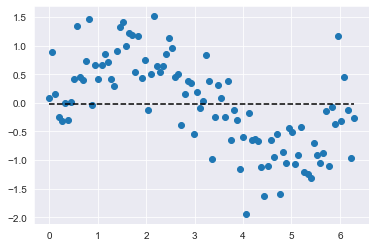

In [55]:
lasso = Lasso(alpha=1.0, random_state=1234)
lasso.fit(X_garbage, y)

# this adds a regressor cost function to prevent overfitting with an alpha value of 1

plt.scatter(df.x, df.y)

plt.plot(df.x, lasso.predict(X_garbage), 'k--')
plt.show()

# this plots the function

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="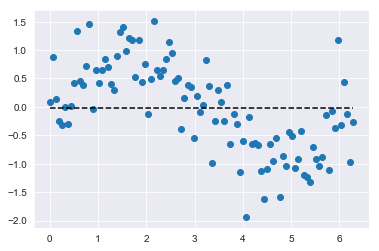&#10;">

#### B.) Based on what you know about the penalty strength, what do you think will happen if you increase it 2.0?
* Go ahead and try it out. Fit and plot the Lasso Regression with <code>alpha=2.0</code>.

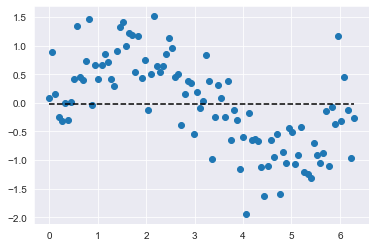

In [56]:
lasso = Lasso(alpha=2.0, random_state=1234)
lasso.fit(X_garbage, y)

plt.scatter(df.x, df.y)

plt.plot(df.x, lasso.predict(X_garbage), 'k--')
plt.show()

#### C.) Loop through the following 5 candidate values for penalty strength. Fit and plot Lasso Regressions on the garbage dataset using each one.
* Candidate values: <code>[0.01, 0.05, 0.1, 0.5, 1]</code>.
* Label each plot's title as **Alpha: penalty** where "penalty" is the dynamically inserted penalty value used to train that model.
* Based on a quick eyeball test, which one appears to have the best performance on the garbage dataset?

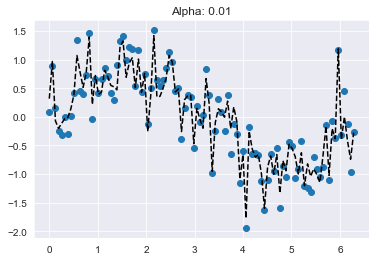

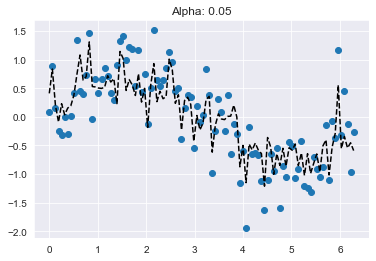

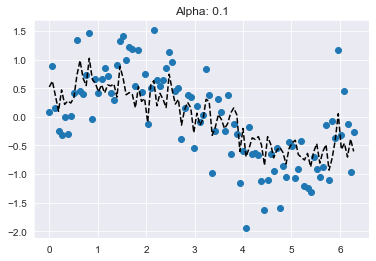

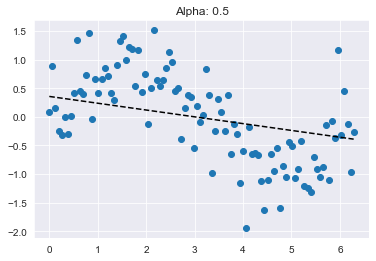

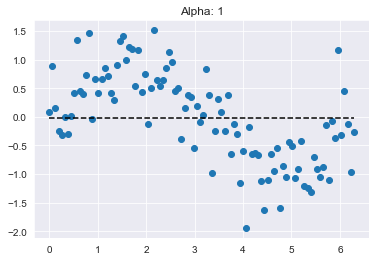

In [57]:
for penalty in [0.01, 0.05, 0.1, 0.5, 1]:
    lasso = Lasso(alpha=penalty, random_state=1234)
    lasso.fit(X_garbage, y)
    
    plt.scatter(df.x, df.y)
    
    plt.plot(df.x, lasso.predict(X_garbage), 'k--')
    plt.title('Alpha: {}'.format(penalty))
    
    plt.show()

What you just did could be considered a very rudimentary form of **model tuning.** You tried out different candidate values for an important hyperparameter (penalty strength), evaluated their performances, and made an initial guess on the optimal value for that hyperparameter.

As we'll see in the next module, the actual model tuning process will not be much different in terms of setup, but it WILL be much more systematic, automated, and empirical. Specifically, it will incorporate **hyperparameter grids** and **cross-validation** to help you reliably and automatically arrive at the best hyperparameter values.

## <span style="color:RoyalBlue">Exercise 4.3 - Ridge Regression</span>

Whereas Lasso regression relies on the $L_1$ penalty, Ridge regression completely relies on the $L_2$ penalty (**squared**) instead. Practically, this leads to smaller coefficients, but it doesn't force them to 0.

#### A.) Fit and plot a Ridge Regression on the garbage dataset with <code>alpha=1.0</code> and <code>random_state=1234</code>.
* Is this overfit or underfit?

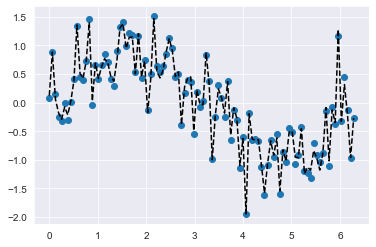

In [58]:
ridge = Ridge(alpha=1.0, random_state=1234)
ridge.fit(X_garbage, y)

plt.scatter(df.x, df.y)

plt.plot(df.x, ridge.predict(X_garbage), 'k--')
plt.show()

#### B.) Based on your plot from part (A) and what you know about penalty strengths, what do you think will happen if you reduce penalty strength to <code>alpha=0.5</code>?
* Go ahead and try it out. Fit and plot the Lasso Regression with <code>alpha=0.5</code>.

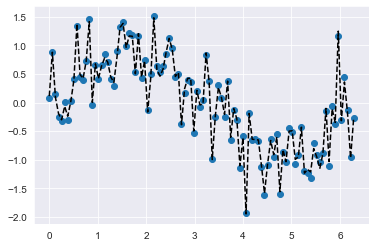

In [59]:
ridge = Ridge(alpha=0.5, random_state=1234)
ridge.fit(X_garbage, y)

plt.scatter(df.x, df.y)

plt.plot(df.x, ridge.predict(X_garbage), 'k--')
plt.show()

#### C.) Based on what you've learned so far, propose 5 candidate values for the penalty strength of the Ridge Regression.
* Why did you choose those 5 values?
* Fit and plot them to evaluate their performance.
* See the answer key for the 5 values we chose (there's no single "right" answer).

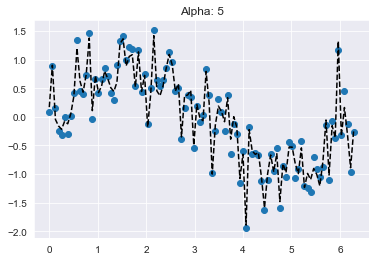

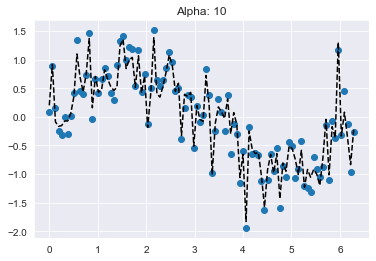

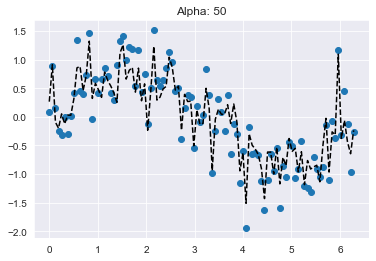

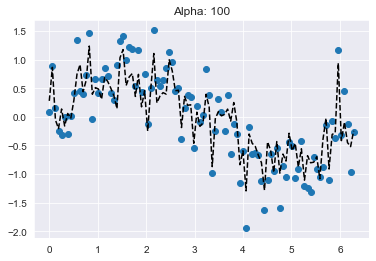

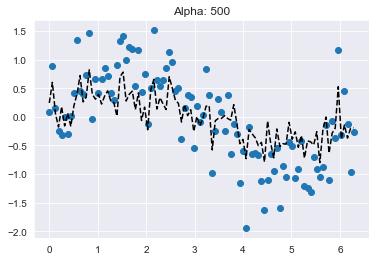

In [60]:
for penalty in [5, 10, 50, 100, 500]:
    ridge = Ridge(alpha=penalty, random_state=1234)
    ridge.fit(X_garbage, y)
    
    plt.scatter(df.x, df.y)
    
    plt.plot(df.x, ridge.predict(X_garbage), 'k--')
    plt.title('Alpha: {}'.format(penalty))
    
    plt.show()

#### D.) What do you think happens if you increase the penalty strength all the way up?
* Go ahead a try a model with <code>alpha=1000000</code>.
* Do you think the coefficients are pushed to 0?

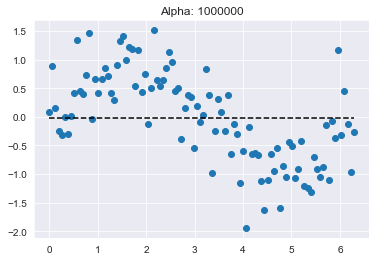

In [61]:
for penalty in [1000000]:
    lasso = Lasso(alpha=penalty, random_state=1234)
    lasso.fit(X_garbage, y)
    
    plt.scatter(df.x, df.y)
    
    plt.plot(df.x, lasso.predict(X_garbage), 'k--')
    plt.title('Alpha: {}'.format(penalty))
    
    plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="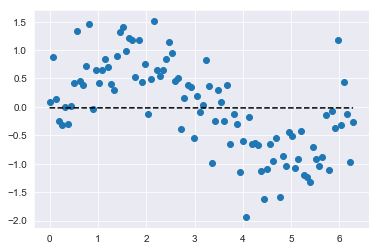&#10;">

While the plot itself appears to be a straight horizontal line, much like the mean model, the coefficients should not actually be forced to 0. They might approach zero or come close to zero, but $L_2$ regularization only shrinks coefficients - it does not actually set them to 0.

#### E.) Confirm that the coefficients of the Ridge Regression model are not actually set to 0.
* Print the coefficients and confirm for yourself.

In [62]:
print( ridge.coef_ )

[-0.08536528  0.00408933 -0.00672797 -0.01085815 -0.00217893 -0.00242867
 -0.00684161 -0.02229582 -0.00862738  0.01379556  0.00627596 -0.02597232
 -0.02677018  0.00858136 -0.0038713  -0.0013108  -0.01490729 -0.00126555
 -0.00054638  0.02482059 -0.01611759  0.01413444  0.01265386  0.01134982
 -0.00020011 -0.0216244  -0.00632348 -0.01721816 -0.00613787 -0.01667364
 -0.01862001 -0.00391727  0.00721854 -0.01018436  0.01577625 -0.00043814
  0.01448572  0.00953998 -0.00077431 -0.0114402  -0.0086619   0.00179454
 -0.00227322  0.01796936 -0.00658105  0.00957969  0.0024668   0.01080126
  0.00320224 -0.00664532  0.02146006  0.00541333  0.00551307 -0.02110909
  0.00197106 -0.00556974 -0.01609698 -0.00144495 -0.01621677  0.01560621
 -0.02183346  0.00326893 -0.01684732 -0.00943401  0.00025837  0.00900946
 -0.01718735 -0.00921861  0.01304174  0.02087823  0.01428253  0.02733043
  0.00213787  0.02146286  0.01571371 -0.00349662  0.00571644 -0.01329706
 -0.01193287  0.00407732 -0.0008772   0.00234803 -0

## <span style="color:RoyalBlue">Exercise 4.4 - Elastic-Net</span>

Last but not least, we have Elastic-Net. Elastic-Net combines both $L_1$ and $L_2$ penalties.
* The ratio of $L_1$ and $L_2$ penalties should be **tuned**. The parameter name is <code>l1_ratio</code>.
* The strength of the penalties should also be **tuned**. The parameter name is still <code>alpha</code>.

#### A.) First, fit and plot an Elastic-Net that uses the default hyperparameter values.
* The default <code>alpha</code> is 1.0.
* The default <code>l1_ratio</code> is 0.5 (i.e. weights the $L_1$ and $L_2$ penalties equally).
* For consistency, set <code>random_state=1234</code>.

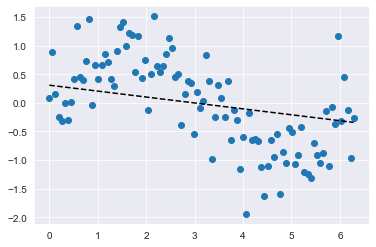

In [68]:
enet = ElasticNet(alpha=1.0,
                 l1_ratio=0.5,
                 random_state=1234)

#l1 ratio weights both L1 and L2 equally

enet.fit(X_garbage, y)

plt.scatter(df.x, df.y)

plt.plot(df.x, enet.predict(X_garbage), 'k--')
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="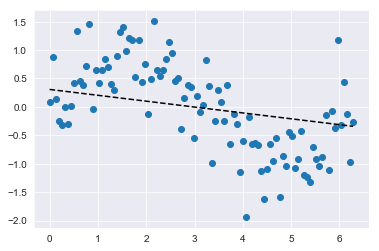&#10;">

#### B.) Next, print the coefficients of the elastic-net model.
* What do you notice?

In [69]:
print( enet.coef_ )

[-0.1033666  0.        -0.        -0.         0.         0.
 -0.        -0.        -0.         0.         0.        -0.
 -0.         0.         0.        -0.        -0.         0.
 -0.         0.        -0.         0.         0.         0.
 -0.        -0.        -0.        -0.        -0.        -0.
 -0.        -0.         0.        -0.         0.        -0.
  0.         0.        -0.        -0.        -0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.         0.         0.         0.        -0.
  0.        -0.        -0.         0.        -0.         0.
 -0.         0.        -0.        -0.        -0.         0.
 -0.        -0.         0.         0.         0.         0.
  0.         0.         0.        -0.         0.        -0.
 -0.         0.         0.         0.        -0.        -0.
 -0.         0.        -0.         0.         0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.        -0.         0.   

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[-0.1033666  0.        -0.        -0.         0.         0.
 -0.        -0.        -0.         0.         0.        -0.
 -0.         0.         0.        -0.        -0.         0.
 -0.         0.        -0.         0.         0.         0.
 -0.        -0.        -0.        -0.        -0.        -0.
 -0.        -0.         0.        -0.         0.        -0.
  0.         0.        -0.        -0.        -0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.         0.         0.         0.        -0.
  0.        -0.        -0.         0.        -0.         0.
 -0.         0.        -0.        -0.        -0.         0.
 -0.        -0.         0.         0.         0.         0.
  0.         0.         0.        -0.         0.        -0.
 -0.         0.         0.         0.        -0.        -0.
 -0.         0.        -0.         0.         0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.        -0.         0.       ]
</pre>

*The elastic-net with default hyperparameter values appears to have set all coefficients to 0 except the one coefficient for $x$. This is equivalent to a simple linear regression. Note that this won't happen for all datasets... the effects of penalty strength and penalty ratios vary from dataset to dataset!*

#### C.) What do you think will happen if you set <code>l1_ratio = 0.9</code>? Try it!

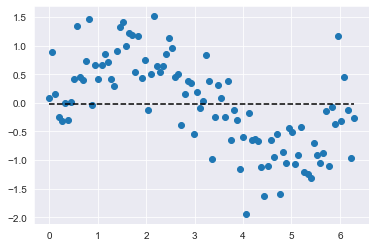

In [70]:
enet = ElasticNet(alpha=1.0,
                 l1_ratio=0.9,
                  random_state=1234)

enet.fit(X_garbage, y)

plt.scatter(df.x, df.y)

plt.plot(df.x, enet.predict(X_garbage), 'k--')
plt.show()

#### D.) Display the coefficients of the elastic-net with <code>l1_ratio = 0.9</code>.
* Does the output confirm your suspicions from part (C)?

In [72]:
print( enet.coef_ )

[-0.  0. -0. -0.  0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.
  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.
  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0.  0.]


#### E.) What do you think will happen if you set <code>l1_ratio = 0.1</code>? Try it!

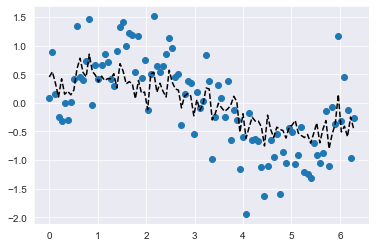

In [73]:
enet = ElasticNet(alpha=1.0,
                 l1_ratio=0.1,
                 random_state=1234)

#l1 ratio weights both L1 and L2 equally

enet.fit(X_garbage, y)

plt.scatter(df.x, df.y)

plt.plot(df.x, enet.predict(X_garbage), 'k--')
plt.show()

#### F.) Display the coefficients of the elastic-net with <code>l1_ratio = 0.1</code>.
* Does the output confirm your suspicions from part (E)?

In [74]:
print ( enet.coef_ )

[-1.68786818e-01  0.00000000e+00 -0.00000000e+00 -8.69081194e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.74644068e-02
 -0.00000000e+00  6.10833269e-03  0.00000000e+00 -2.18782907e-02
 -2.08478104e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.34108154e-03  0.00000000e+00 -0.00000000e+00  2.67402422e-02
 -6.04518012e-05  9.18142722e-03  0.00000000e+00  6.63515493e-03
 -0.00000000e+00 -5.80086654e-03 -0.00000000e+00 -2.18650865e-02
 -0.00000000e+00 -0.00000000e+00 -1.54386802e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  8.23499114e-03
 -0.00000000e+00  2.35320954e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.05831559e-02  0.00000000e+00
  0.00000000e+00 -1.25327207e-02 -0.00000000e+00  0.00000000e+00
 -5.51802084e-03  0.00000000e+00 -5.66401067e-04  1.07939263e-02
 -1.45990846e-02  0.00000

#### G.) Finally, loop through and try elastic-nets with the candidate <code>l1_ratio</code> values of <code>[0.1, 0.3, 0.5, 0.7, 0.9]</code>.
* Observe the progression of the model!
* Label each plot's title as **L1 Ratio: ratio** where "ratio" is the dynamically inserted l1_ratio value used to train that model.
* Keep the alpha value as default.
* Are the results what you expected?

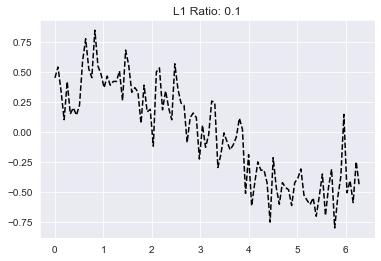

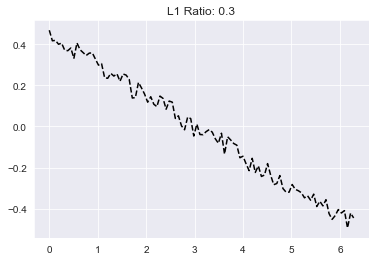

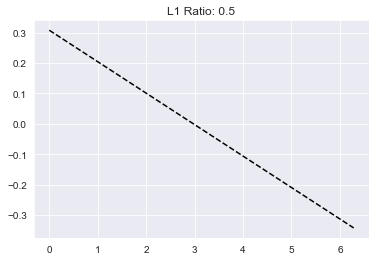

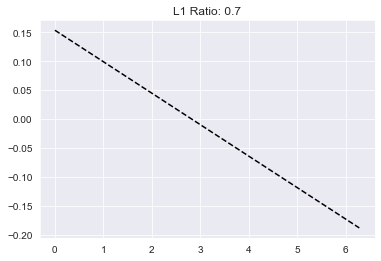

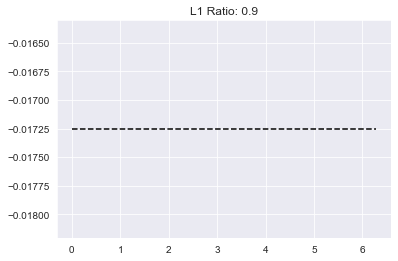

In [75]:
for ratio in [0.1, 0.3, 0.5, 0.7, 0.9]:
    
    enet = ElasticNet(l1_ratio=ratio, random_state=1234)
    enet.fit(X_garbage, y)
    
    plt.plot(df.x, enet.predict(X_garbage), 'k--')
    plt.title('L1 Ratio: {}'.format(ratio))
    plt.show()

Alright, that was a nice detour through some key theory and concepts, but let's get ready to dive back into our real-estate dataset! As a reminder, here are a few things you did in this module:
* You got a preview of the final boss of machine learning: overfitting.
* You saw how regularization helps select features and shrink coefficients.
* You learned how ensembles can improve predictions by committee.
* And you recruited 5 effective algorithms: **Lasso, Ridge, Elastic-Net, Random Forests, and Boosted Trees.**

Now that we've recruited our 5 candidate algorithms, it's time to see which one performs the best! In the next module, we'll use these algorithms alongside other powerful tactics to defeat overfitting and create a kick-ass model!